In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import numpy as np
import pandas as pd

In [3]:
y_true = np.array([0, 1, 1, 0, 0, 0, 0, 0])
y_pred = np.array([0, 1, 0, 1, 0, 0, 1, 1])

tp = ((y_true == 1) & (y_pred == 1)).sum()
tn = ((y_true == 0) & (y_pred == 0)).sum()
fp = ((y_true == 0) & (y_pred == 1)).sum()
fn = ((y_true == 1) & (y_pred == 0)).sum()
tp

1

In [4]:
def accuracy(y_true, y_pred):
    tp = ((y_true == 1) & (y_pred == 1)).sum()
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    return (tp+tn)/len(y_true)

In [5]:
y_true1 = np.array([0, 1, 1, 0, 0, 0, 0, 0])
y_pred1 = np.array([0, 1, 0, 1, 0, 0, 1, 1])

In [6]:
accurac1 = accuracy(y_true1, y_pred1)
accurac1

0.5

In [7]:
def accuracy2(y_true, y_pred):
    tpn = (y_true == y_pred).sum()
    all_n = len(y_true)
    return tpn/all_n

In [8]:
accurac2 = accuracy2(y_true1, y_pred1)
accurac2

0.5

-------------------

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
columns = [f"feature_{i}" for i in range(1, 58)] + ["is_spam"]
data = pd.read_csv(url, names=columns)

In [10]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [11]:
len(data)

4601

In [12]:
X = data.drop('is_spam', axis=1)
X.columns
y = data['is_spam']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = LogisticRegression(max_iter=400, penalty=None)
model.fit(X_train_scaled, y_train)

C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty=None)

In [16]:
y_pred = model.predict(X_test_scaled)

In [17]:
accuracy = accuracy_score(y_test, y_pred)

In [18]:
accuracy

0.9131378935939196

In [19]:
model.classes_

array([0, 1], dtype=int64)

In [20]:
model.coef_[0][0]

-0.08953742959651774

In [21]:
model.intercept_

array([-22.76954154])

In [22]:
model.n_iter_

array([400])

In [23]:
model.tol

0.0001

In [24]:
model.solver

'lbfgs'

In [25]:
from sklearn.datasets import load_breast_cancer

In [26]:
data = load_breast_cancer()
X, y = data.data, data.target

In [27]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
np.sum(np.isnan(X))

0

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [32]:
model_base = LogisticRegression(penalty=None)
model_base.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None)

In [33]:
y_pred_base = model_base.predict(X_test_scaled)

In [34]:
accuracy_score(y_test, y_pred_base)

0.9385964912280702

In [35]:
model_base.coef_

array([[  18.67443273,  -38.77042061,   85.86399926,   21.8257228 ,
           9.94570073,  599.62574665, -292.31615423, -579.85045482,
          88.15339417, -367.90409663, -566.49052441,   78.56768921,
         253.55310196, -364.74899575, -170.57609367, -213.95019909,
         537.73121534, -153.72217854,  208.77254509,  286.78506526,
        -231.75346764, -197.86154662,  159.55047729, -227.01410725,
         203.4098774 ,   63.44419564, -531.47590122,  -19.53772394,
        -367.00572403,  130.08103858]])

In [36]:
np.max(np.abs(model_base.coef_[0]))

599.6257466519647

In [37]:
model_base = LogisticRegression(penalty='l2')
model_base.fit(X_train_scaled, y_train)

y_pred_base = model_base.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_base))

y_pred_base_train = model_base.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred_base_train))

np.max(np.abs(model_base.coef_[0]))

0.9736842105263158
0.9868131868131869


1.3421882977984962

In [38]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train_scaled, y_train)

y_pred_l1 = model_l1.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_l1))

y_pred_l1_train = model_l1.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred_l1_train))

np.max(np.abs(model_base.coef_[0]))

0.9736842105263158
0.989010989010989


1.3421882977984962

-----------------

In [39]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [40]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Zmienna 1')
    plt.ylabel('Zmienna 2')
    plt.title('Granica decyzyjna modelu regresji logistycznej')
    plt.show()

In [41]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=43) 

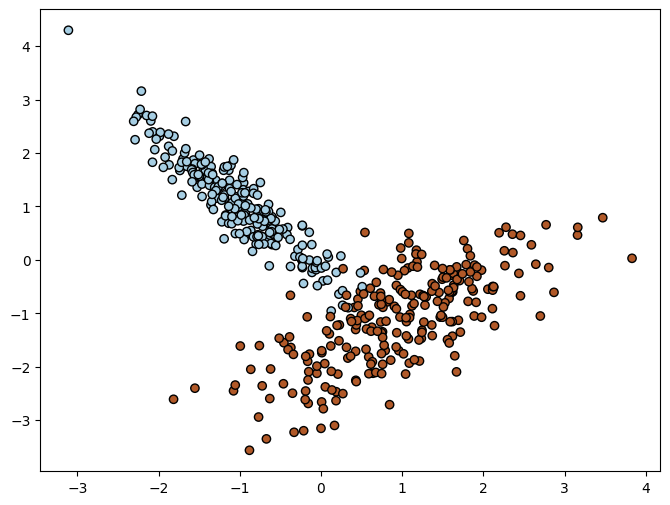

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None)

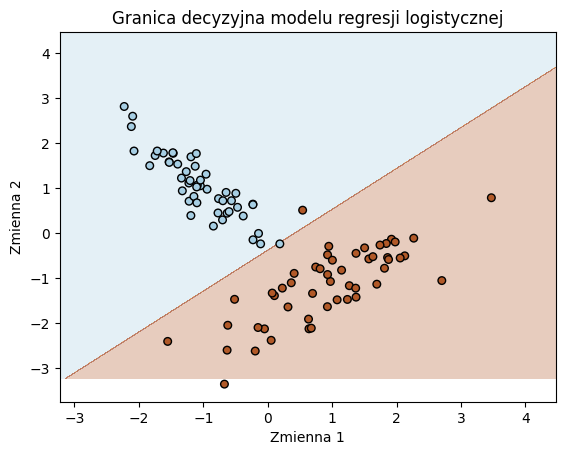

In [45]:
plot_decision_boundary(model, X_test, y_test)

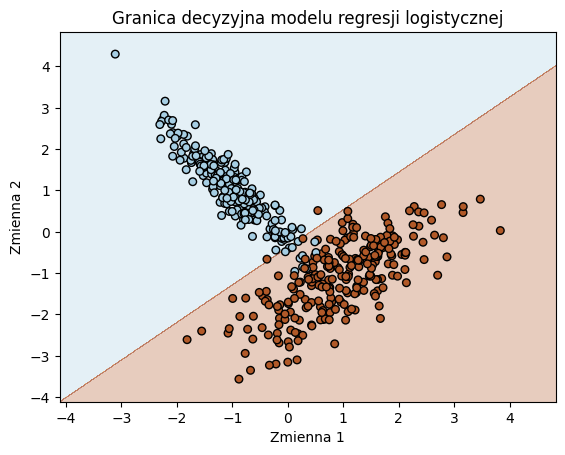

In [46]:
plot_decision_boundary(model, X, y)

In [47]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)


In [48]:
cv_scores

array([0.9625, 1.    , 0.9625, 0.95  , 0.9375])

In [49]:
print(f"Srednia dokladnosc z kroswalidacji: {np.mean(cv_scores):.4f}")

Srednia dokladnosc z kroswalidacji: 0.9625


In [50]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression()),
])

pipeline.fit(X_train_scaled, y_train)

y_pred = pipeline.predict(X_test_scaled)
print('accuracy score:  ', accuracy_score(y_test, y_pred))

accuracy score:   0.98


In [51]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression()),
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear'],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='accuracy')

In [52]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
0.9675


In [53]:
y_pred = grid_search.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.98


--------------------

In [54]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [56]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression()),
])

param_grid = {
    'logreg__C': [0.01, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 50, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', ],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10,
                                       50, 100],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='accuracy')

In [57]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
0.9780219780219781


In [58]:
y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9912280701754386


--------------------

In [59]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [60]:
iris = load_iris()

In [61]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [62]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9833333333333333


----------------

In [64]:
df = pd.read_csv('SAHeart.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [65]:
df['famhist'] = df['famhist'].replace({'Present': 1, 'Absent': 0})

In [66]:
X = df.drop('chd', axis=1)
y = df['chd']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [69]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6774193548387096


In [70]:
model.tree_

In [71]:
model.tree_.max_depth

5

In [72]:
model.tree_.feature

array([ 8,  8,  6,  2,  5, -2, -2, -2,  0,  8, -2, -2,  0, -2, -2,  5,  6,
       -2,  2, -2, -2,  2, -2,  0, -2, -2,  2,  2, -2,  4,  2, -2, -2,  0,
       -2, -2,  3, -2, -2], dtype=int64)

In [73]:
len(model.tree_.threshold)

39

In [74]:
model.tree_.node_count

39

In [75]:
from sklearn.tree import plot_tree

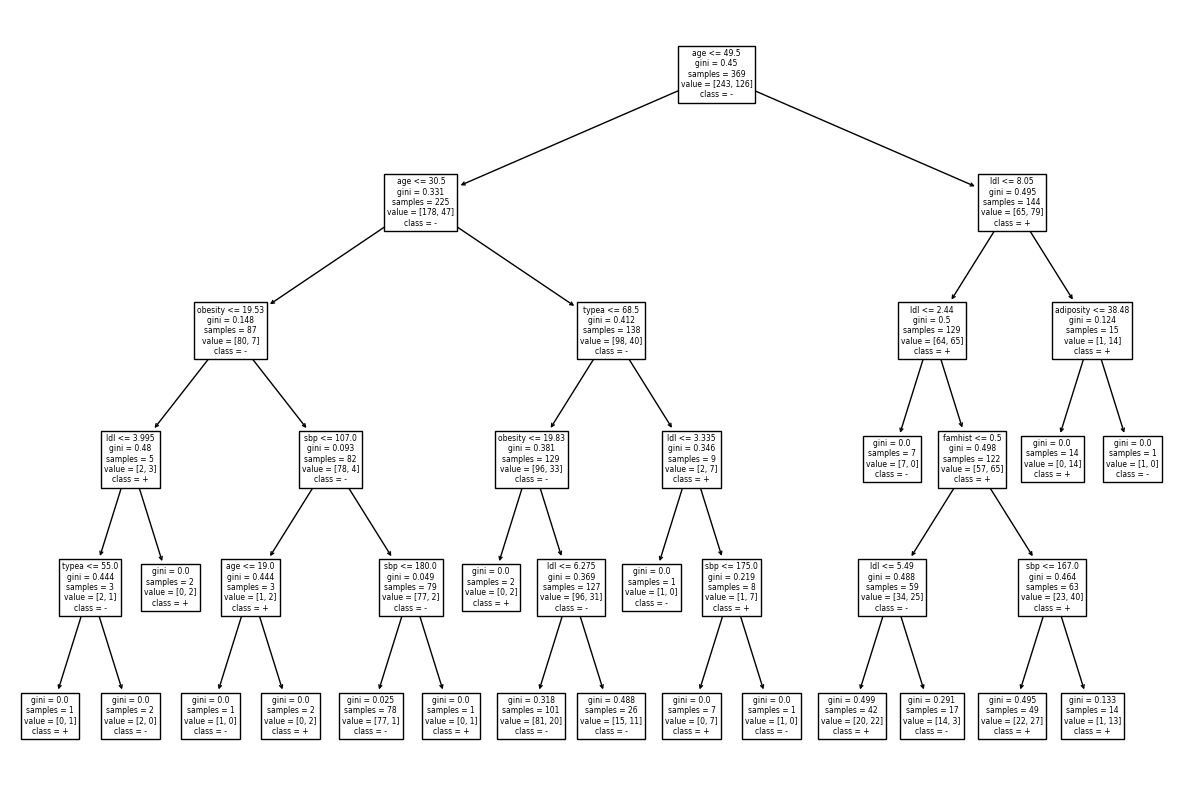

In [76]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X_train.columns, class_names=['-', '+'])
plt.savefig('example tree SAHeart')
plt.show()

In [77]:
pipeline = Pipeline([('tree', DecisionTreeClassifier())])

In [78]:
param_grid = {
    'tree__criterion': ['gini', 'entropy', 'log_loss'],
    'tree__max_depth': [2, 4, 6, 8, 10, 20, None],
    'tree__min_samples_split': [2, 5, 10]
}

In [79]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tree', DecisionTreeClassifier())]),
             param_grid={'tree__criterion': ['gini', 'entropy', 'log_loss'],
                         'tree__max_depth': [2, 4, 6, 8, 10, 20, None],
                         'tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [80]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'tree__criterion': 'entropy', 'tree__max_depth': 6, 'tree__min_samples_split': 2}
0.6558311736393928


In [81]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.7096774193548387

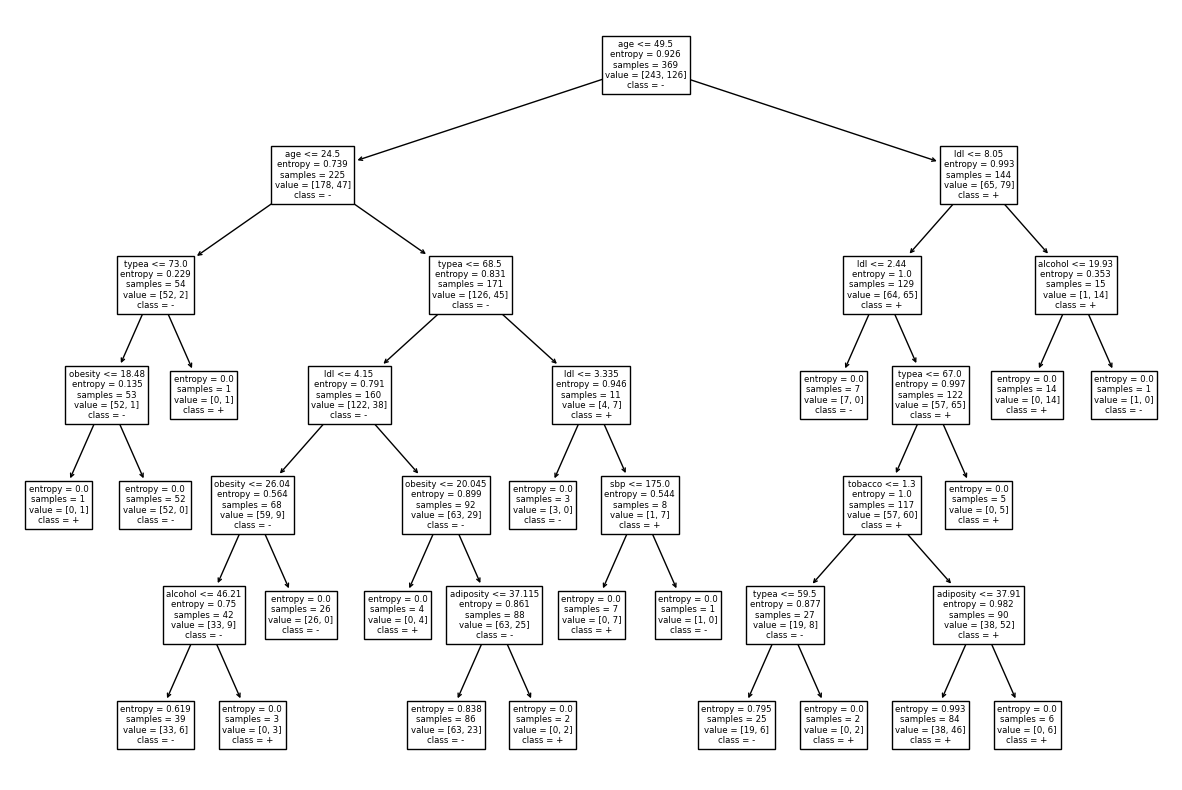

In [82]:
plt.figure(figsize=(15, 10))
plot_tree(grid_search.best_estimator_['tree'], feature_names=X_train.columns, class_names=['-', '+'])
# plt.savefig('example tree SAHeart')
plt.show()

In [83]:
 grid_search.best_estimator_['tree'].feature_names_in_

array(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age'], dtype=object)

In [84]:
 grid_search.best_estimator_['tree'].feature_importances_

array([0.03057112, 0.03410017, 0.19421834, 0.06109163, 0.        ,
       0.13286347, 0.14741573, 0.08877428, 0.31096526])

------

In [85]:
# data = load_breast_cancer()
# X, y = data.data, data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = grid_search.best_estimator_['tree']
node_indicator = model.decision_path(X_test)
leaf_id = model.apply(X_test)
feature = model.tree_.feature
threshold = model.tree_.threshold

In [87]:
sample_id = 0
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id]:node_indicator.indptr[sample_id + 1]
]

In [88]:
print(f'Sciezka decyzyjna dla sample {sample_id=}')
for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue

    if X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = '<='
    else:
        threshold_sign = '>'

    print(
        f'Wezeł {node_id}: (X_test[{sample_id}, {X_test.columns[feature[node_id]]} = {X_test.iloc[sample_id, feature[node_id]]})'
        f'{threshold_sign} {threshold[node_id]}'
    )

Sciezka decyzyjna dla sample sample_id=0
Wezeł 0: (X_test[0, age = 42)<= 49.5
Wezeł 1: (X_test[0, age = 42)> 24.5
Wezeł 7: (X_test[0, typea = 58)<= 68.5
Wezeł 8: (X_test[0, ldl = 4.86)> 4.1499998569488525
Wezeł 14: (X_test[0, obesity = 24.69)> 20.045000076293945
Wezeł 16: (X_test[0, adiposity = 23.59)<= 37.114999771118164


In [89]:
path = model.cost_complexity_pruning_path(X_train, y_train)

In [90]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Impurity')

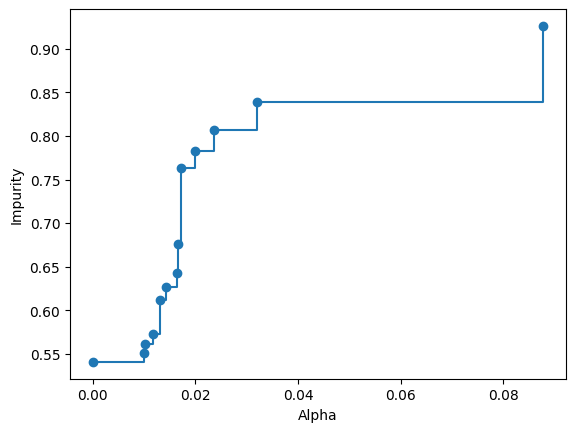

In [91]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
ax.set_xlabel('Alpha')
ax.set_ylabel('Impurity')

In [92]:
trees = []
tree_scores = []

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=0)
    tree.fit(X_train, y_train)
    trees.append(tree)
    tree_scores.append(tree.score(X_train, y_train))

In [93]:
print(f'Liczba wezlow ostatniego drezwa to: {trees[-1].tree_.node_count} z {ccp_alphas[-1]=}')

Liczba wezlow ostatniego drezwa to: 1 z ccp_alphas[-1]=0.0878079998950515


In [94]:
trees = trees[:-1]

In [95]:
ccp_alphas = ccp_alphas[:-1]

In [96]:
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]

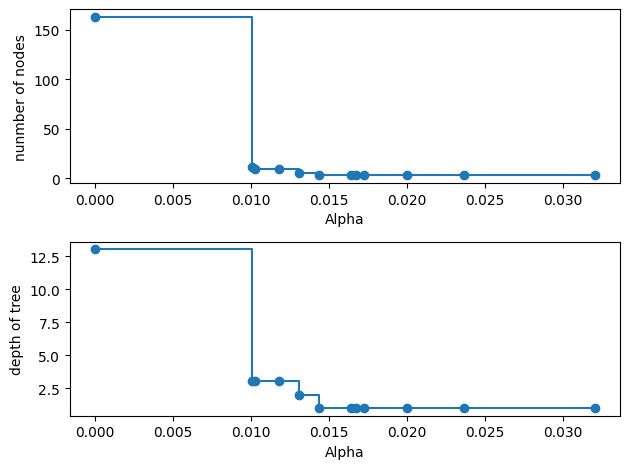

In [97]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('nunmber of nodes')

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('depth of tree')

fig.tight_layout()

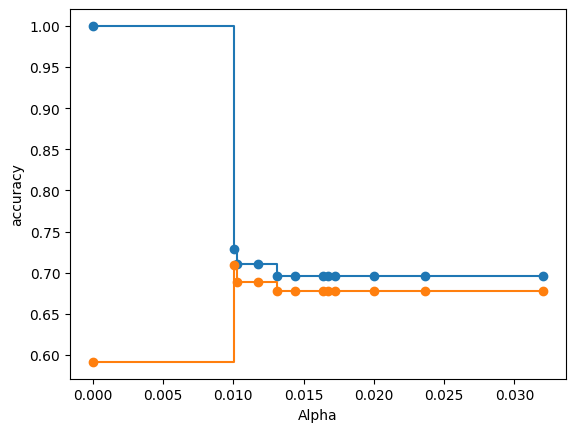

In [98]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

fig, ax = plt.subplots()
ax.plot(ccp_alphas, train_scores, marker='o', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', drawstyle='steps-post')
ax.set_xlabel('Alpha')
ax.set_ylabel('accuracy')
plt.show()



In [99]:
best_ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))]
best_tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.010072449270040418)

In [149]:
def generate_noisy_xor(n_samples, noise_level=0.1):
    np.random.seed(42)
    X = np.random.rand(n_samples, 2)
    y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)

    noise = np.random.rand(n_samples)
    y_noisy = np.where(noise < noise_level, 1 - y, y)

    return X, y_noisy


def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel('Zmienna 1')
    plt.ylabel('Zmienna 2')
    plt.title(title)
    plt.show()

def plot_decision_boundary_2(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

In [141]:
X, y = generate_noisy_xor(n_samples=1000, noise_level=0.01)

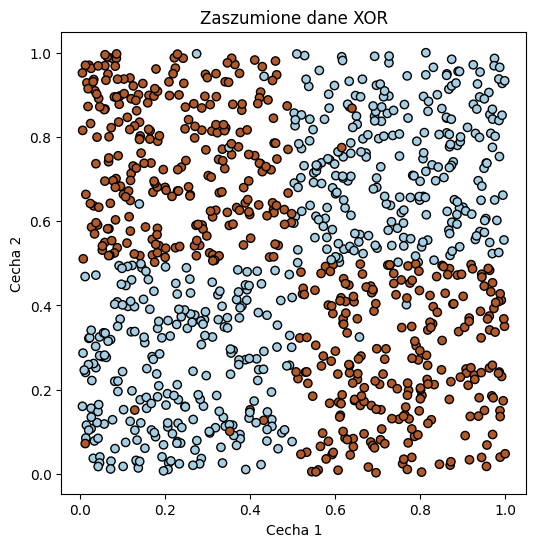

In [142]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('Zaszumione dane XOR')
plt.show()

In [143]:
model_tree = DecisionTreeClassifier().fit(X, y)
model_logreg = LogisticRegression().fit(X, y)

AttributeError: 'Axes' object has no attribute 'xlabel'

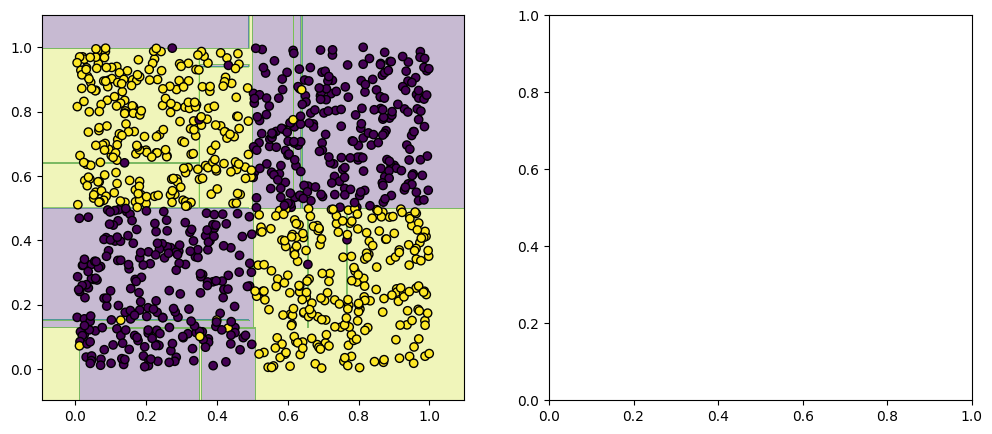

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(model_tree, X, y, ax[0], "Drzewo Decyzyjne")
plot_decision_boundary(model_logreg, X, y, ax[1], "Regresja_logicztyczna")

plt.tight_layout()

-----------------

--------------------------

-----------------

#### klasyfikacja wieloklasowa

In [105]:
from sklearn.model_selection import StratifiedKFold

In [106]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [107]:
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2]), array([0, 1, 2]))

In [108]:
model_ovr = LogisticRegression(multi_class='ovr').fit(X_train, y_train)
model_multinomial = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
model_tree = DecisionTreeClassifier().fit(X_train, y_train)

In [109]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [110]:
scores_ovr = cross_val_score(model_ovr, X_train, y_train, cv=cv, scoring='accuracy')
scores_multinomial = cross_val_score(model_multinomial, X_train, y_train, cv=cv, scoring='accuracy')
scores_tree = cross_val_score(model_tree, X_train, y_train, cv=cv, scoring='accuracy')

C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [111]:
scores_ovr.mean(), scores_ovr.std()

(0.9222222222222223, 0.04444444444444442)

In [112]:
scores_multinomial.mean(), scores_multinomial.std()

(0.9444444444444444, 0.06085806194501844)

In [113]:
scores_tree.mean(), scores_tree.std()

(0.9555555555555555, 0.041573970964154924)

In [114]:
model_multinomial.fit(X_train, y_train)

y_pred = model_multinomial.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [115]:
X = iris.data[:, [2, 3]]
y = iris.target

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


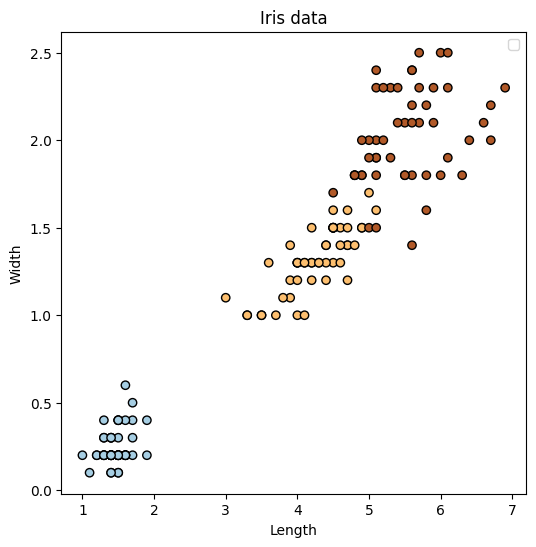

In [117]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris data')
plt.legend()
plt.show()

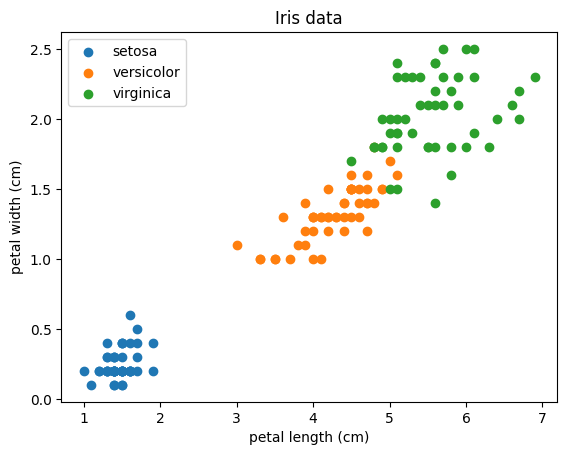

In [118]:
for i in range(len(labels := iris.target_names)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label = labels[i])

plt.xlabel(F'{iris.feature_names[2]}')
plt.ylabel(F'{iris.feature_names[3]}')
plt.title('Iris data')
plt.legend()
plt.show()

In [119]:
from sklearn import svm, datasets

In [120]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

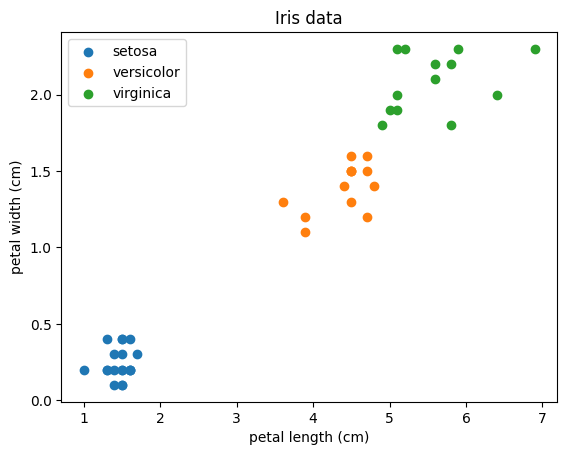

In [121]:
for i in range(len(labels := iris.target_names)):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label = labels[i])

plt.xlabel(F'{iris.feature_names[2]}')
plt.ylabel(F'{iris.feature_names[3]}')
plt.title('Iris data')
plt.legend()
plt.show()

In [122]:
y_pred = svm_linear.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [123]:
# %%timeit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_linear_scaled = svm.SVC(kernel='linear')
svm_linear_scaled.fit(X_train_scaled, y_train)
y_pred = svm_linear_scaled.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

1.0


In [124]:
svm_linear.n_iter_, svm_linear_scaled.n_iter_

(array([ 3,  3, 14], dtype=int32), array([ 6,  3, 12], dtype=int32))

---------------------------

In [125]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


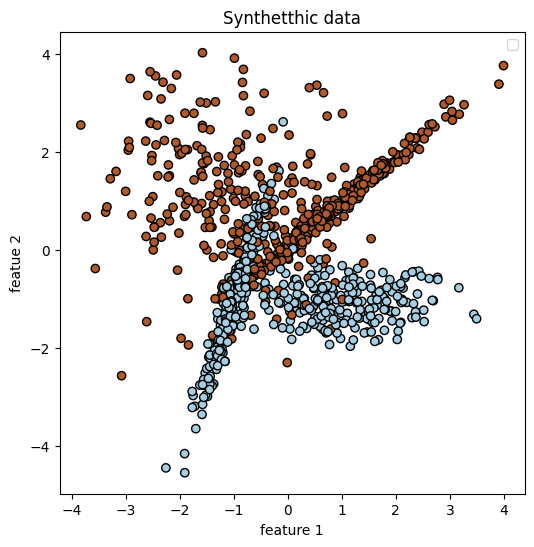

In [126]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('feature 1')
plt.ylabel('featue 2')
plt.title('Synthetthic data')
plt.legend()
plt.show()

In [127]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
print(accuracy_score(y_test, y_pred), svm_linear._num_iter)

0.8766666666666667 [955]


In [128]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_linear', svm.SVC(kernel='linear'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(accuracy_score(y_test, y_pred), pipeline['svm_linear'].n_iter_)

0.8766666666666667 [943]


---------------

In [129]:
X_train_fe = np.column_stack((X_train, X_train[:, 0] * X_train[:, 1]))
X_test_fe = np.column_stack((X_test, X_test[:, 0] * X_test[:, 1]))

In [130]:
pipeline_fe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_linear', svm.SVC(kernel='linear'))
])

pipeline_fe.fit(X_train_fe, y_train)
y_pred_fe = pipeline_fe.predict(X_test_fe)
print(accuracy_score(y_test, y_pred_fe), pipeline_fe['svm_linear'].n_iter_)

0.8733333333333333 [1175]


-------

In [131]:
X, y = datasets.make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC())
])



In [133]:
param_grid = [
    {
        'svm__kernel': ['linear'],
        'svm__C': [0.01, 0.1, 1, 10, 100],
    },
    {
        'svm__kernel': ['rbf'],
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__gamma': ['auto', 'scale', 0.1, 1, 0.01]
    },
    {
        'svm__kernel': ['poly'],
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__degree': [2, 3, 4],
    },
    {
        'svm__kernel': ['sigmoid'],
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__gamma': ['auto', 'scale', 0.1, 1, 0.01]
    }
]

In [134]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid=[{'svm__C': [0.01, 0.1, 1, 10, 100],
                          'svm__kernel': ['linear']},
                         {'svm__C': [0.01, 0.1, 1, 10, 100],
                          'svm__gamma': ['auto', 'scale', 0.1, 1, 0.01],
                          'svm__kernel': ['rbf']},
                         {'svm__C': [0.01, 0.1, 1, 10, 100],
                          'svm__degree': [2, 3, 4], 'svm__kernel': ['poly']},
                         {'svm__C': [0.01, 0.1, 1, 10, 100],
                          'svm__gamma': ['auto', 'scale', 0.1, 1, 0.01],
                          'svm__kernel': ['sigmoid']}],
             scoring='accuracy')

In [135]:
grid_search.best_params_, grid_search.best_score_

({'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'sigmoid'},
 0.8814285714285713)

In [136]:
y_pred = grid_search.predict(X_test)
accuracy2(y_test, y_pred)

0.8433333333333334

In [137]:
def generate_normal_dataset(m, n=500):
    np.random.seed(42)
    x1_y0 = np.random.normal(size=n)
    x2_y0 = np.random.normal(size=n)
    y0 = np.repeat(0, n)
    
    x1_y1 = np.random.normal(m, size=n)
    x2_y1 = np.random.normal(m, size=n)
    y1 = np.repeat(1, n)

    x1 = np.concatenate((x1_y0, x1_y1), axis=0)
    x2 = np.concatenate((x2_y0, x2_y1), axis=0)
    y = np.concatenate((y0, y1), axis=0)

    df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df


def plot_dataset(df, title='Plot'):
    class_0 = df[df['y'] == 0]
    class_1 = df[df['y'] == 1]

    fig, ax = plt.subplots(figsize=(6,6))

    ax.scatter(class_0['x1'], class_0['x2'], color='b', label='Class 0')
    ax.scatter(class_1['x1'], class_1['x2'], color='r', label='Class 1')
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    ax.legend(loc='best')
    plt.show()

    

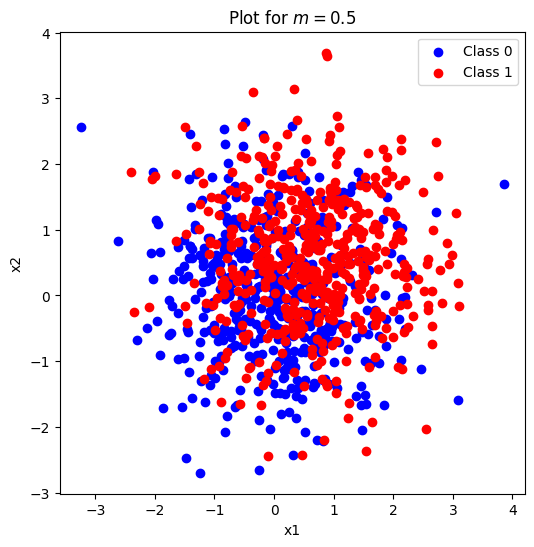

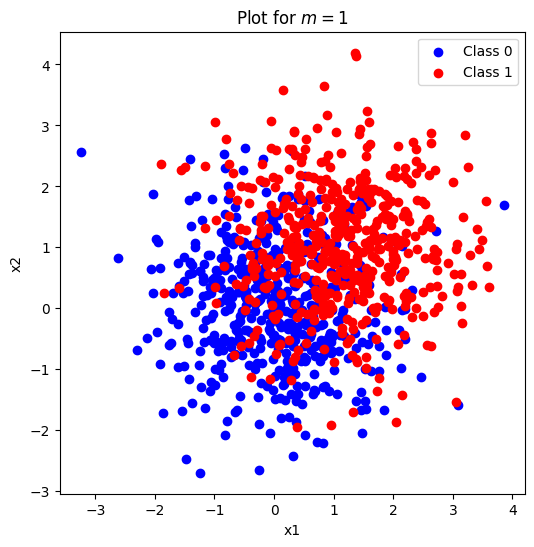

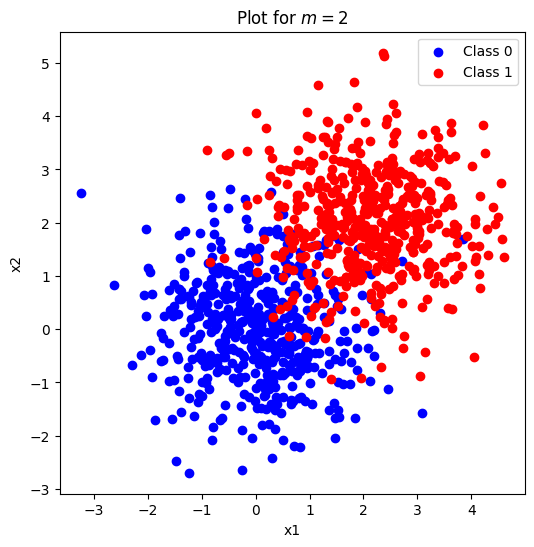

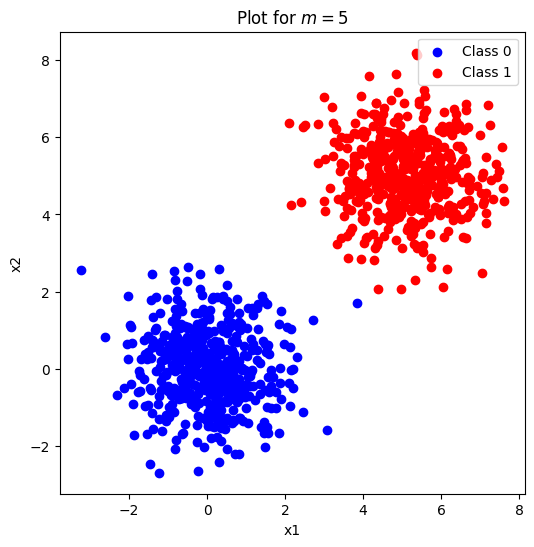

In [138]:
means = [0.5, 1, 2, 5]
for m in means:
    df = generate_normal_dataset(m)
    plot_dataset(df, f'Plot for $m={m}$')

Generowanie danych dla m=0.5
Najlepsze parametry dla m=0.5: {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'sigmoid'}
Najlepsza dokladnosz na zbiosze treningowym: 0.687143
Dokladnosz na zbiosze testoeym: 0.653333


C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


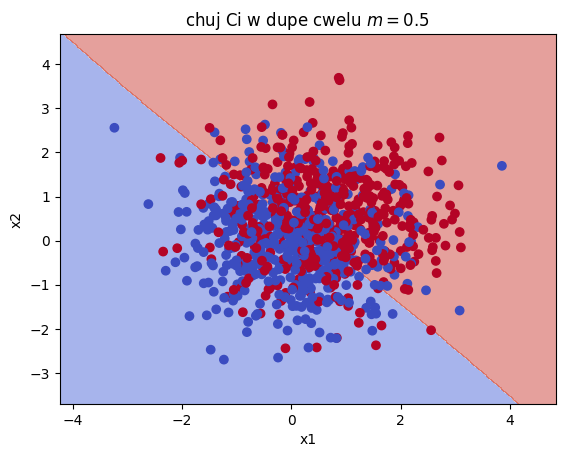

Generowanie danych dla m=1
Najlepsze parametry dla m=1: {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Najlepsza dokladnosz na zbiosze treningowym: 0.802857
Dokladnosz na zbiosze testoeym: 0.746667


C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


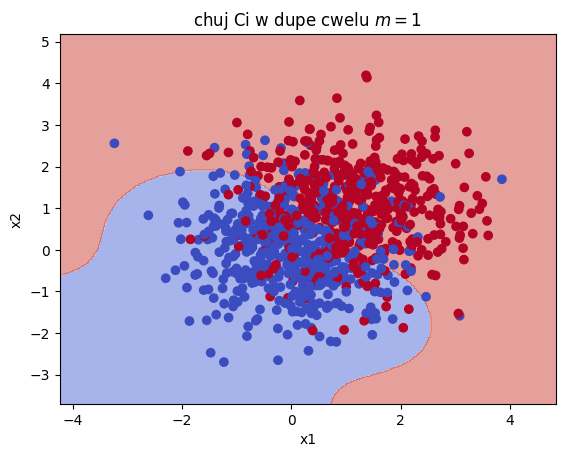

Generowanie danych dla m=2
Najlepsze parametry dla m=2: {'svm__C': 0.01, 'svm__gamma': 1, 'svm__kernel': 'sigmoid'}
Najlepsza dokladnosz na zbiosze treningowym: 0.932857
Dokladnosz na zbiosze testoeym: 0.920000


C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


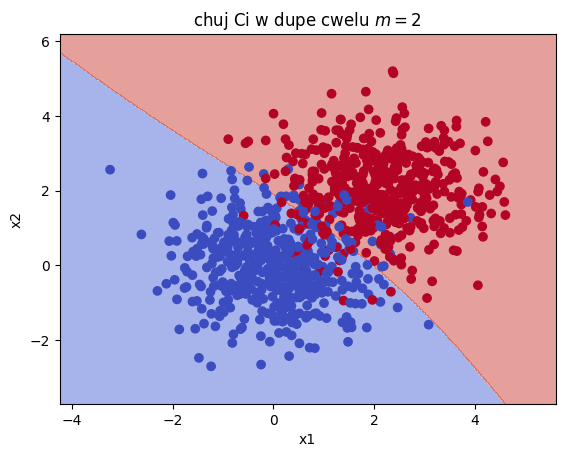

Generowanie danych dla m=5
Najlepsze parametry dla m=5: {'svm__C': 0.01, 'svm__kernel': 'linear'}
Najlepsza dokladnosz na zbiosze treningowym: 0.998571
Dokladnosz na zbiosze testoeym: 1.000000


C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


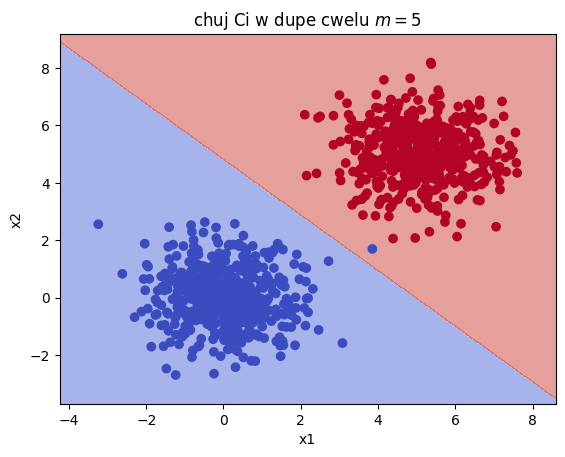

In [150]:
for m in means:
    print(f'Generowanie danych dla {m=}')
    df = generate_normal_dataset(m)
    X = df.drop('y', axis=1)
    y = df['y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f'Najlepsze parametry dla m={m}: {grid_search.best_params_}')
    print(f'Najlepsza dokladnosz na zbiosze treningowym: {grid_search.best_score_:4f}')

    test_accuracy = grid_search.score(X_test, y_test)
    print(f'Dokladnosz na zbiosze testoeym: {test_accuracy:4f}')

    plot_decision_boundary_2(grid_search.best_estimator_, np.array(X), y, f'chuj Ci w dupe cwelu $m={m}$')